In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from pathlib import Path
from sklearn.utils import Bunch
from skimage.io import imread
from skimage.transform import resize

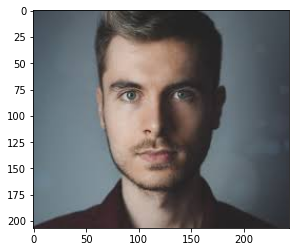

In [3]:
img = plt.imread('Downloads/Human_face/male_face/1.jpg')
plt.imshow(img)

In [4]:
from skimage import io, filters

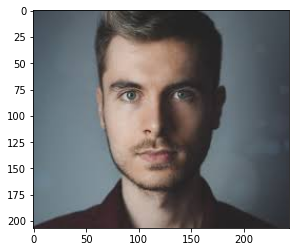

In [5]:
edges = filters.sobel(img)
plt.imshow(img)

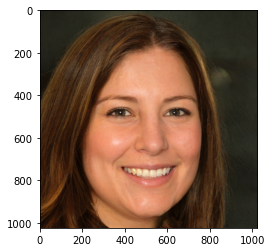

In [7]:
img = plt.imread('Downloads/Human_face/female_face/10.jpg')
plt.imshow(img)

In [8]:
from skimage import io, filters

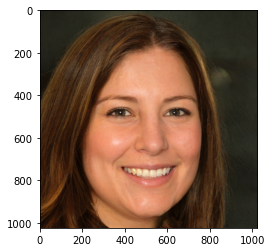

In [9]:
edges = filters.sobel(img)
plt.imshow(img)

In [10]:
def load_image_files(container_path, dimension=(64, 64)):
    
    """Loading Multiple Images From the Folder and Which Consists  of Different Shape of Data We Have to Bring them in 64 ,64 Shape
    as well as 
    Parameters
    ----------
    container_path : string or unicode of images in the SubFolders Path to the main folder holding one subfolder[male_face,female_face] 
    Each and Every category[male_face, female_face]
    Dimensions: We Have Bring Ddifferent Images into Same equal shape
    """
    image_dir = Path(container_path)
    folders = [directory for directory in image_dir.iterdir() if directory.is_dir()]
    categories = [fo.name for fo in folders]

    descr ="""male_face and female_face Image Classification Problem"""
    
    images = []
    flat_data = []
    target = []
    
    for i,direc in enumerate(folders):
        for file in direc.iterdir():
            img = skimage.io.imread(file)
            plt.imshow(img)
            #plt.show()
            
            # Convert Image Sahpe in 64 ,64
            img_resized =resize(img, dimension, anti_aliasing=True, mode='reflect')
            plt.imshow(img_resized)
            flat_data.append(img_resized.flatten())
            images.append(img_resized)
            target.append(i)
    flat_data = np.array(flat_data)
    target = np.array(target)
    images = np.array(images)
    return Bunch(data=flat_data,
                target=target,
                target_name = categories,
                images= images,
                DESCR =descr )

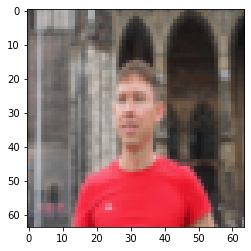

In [11]:
import skimage
image_dataset = load_image_files("Downloads/Human_face")

In [12]:
image_dataset.keys()

dict_keys(['data', 'target', 'target_name', 'images', 'DESCR'])

In [13]:
image_dataset.data

array([[0.12647059, 0.1254902 , 0.09411765, ..., 0.14509804, 0.14901961,
        0.11372549],
       [0.75083487, 0.75475643, 0.76259957, ..., 0.06666667, 0.07058824,
        0.07843137],
       [0.93333333, 0.93333333, 0.93333333, ..., 0.85882353, 0.73333333,
        0.63921569],
       ...,
       [0.53627451, 0.49727137, 0.49779412, ..., 0.98431373, 0.98431373,
        0.99215686],
       [0.57282475, 0.61066176, 0.61988358, ..., 0.91427696, 0.86859681,
        0.90251225],
       [0.342019  , 0.32452512, 0.31372549, ..., 0.47867647, 0.48651961,
        0.51165748]])

In [14]:
image_dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

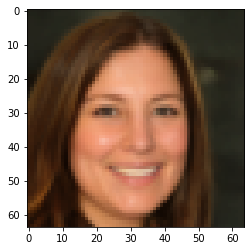

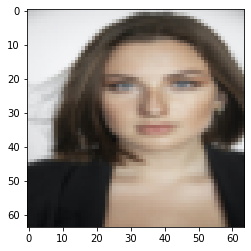

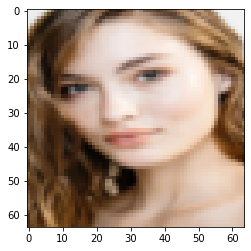

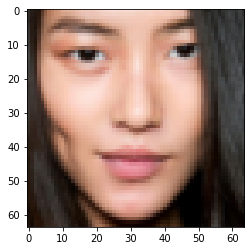

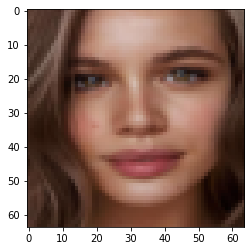

In [15]:
for I in range(5):
    plt.imshow(image_dataset.images[I])
    plt.show()

In [16]:
image_dataset.target_name

['female_face', 'male_face']

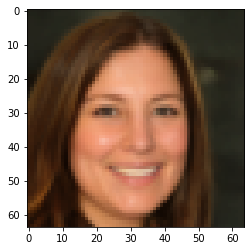

In [17]:
plt.imshow(image_dataset.images[0])

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test = train_test_split(image_dataset.data,image_dataset.target,random_state=1)
x_train.shape

(26, 12288)

In [20]:
x_test.shape

(9, 12288)

In [21]:
x_train.shape[0] != y_test.shape[0]

True

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
LR = LogisticRegression(max_iter=500,solver="newton-cg",C=0.001)
LR

LogisticRegression(C=0.001, max_iter=500, solver='newton-cg')

In [24]:
LR.fit(x_train,y_train)

LogisticRegression(C=0.001, max_iter=500, solver='newton-cg')

In [25]:
Train_Score = LR.score(x_train,y_train)
Train_Score

0.7307692307692307

In [26]:
Test_score = LR.score(x_test,y_test)
Test_score

0.4444444444444444

In [27]:
yhat = LR.predict(x_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 0])

In [28]:
pd.DataFrame({"Actual Data":y_test,
             "New_predication":yhat})

,Actual Data,New_predication
0,0,0
1,0,0
2,0,0
3,1,0
4,1,0
5,1,0
6,0,0
7,1,0
8,1,0


In [29]:
log_loss = LR.predict_proba(x_train)
log_loss

array([[0.5673771 , 0.4326229 ],
       [0.76828408, 0.23171592],
       [0.67296175, 0.32703825],
       [0.84046964, 0.15953036],
       [0.80968917, 0.19031083],
       [0.65366079, 0.34633921],
       [0.56978554, 0.43021446],
       [0.79397148, 0.20602852],
       [0.51281702, 0.48718298],
       [0.61018144, 0.38981856],
       [0.74967887, 0.25032113],
       [0.71593307, 0.28406693],
       [0.73302416, 0.26697584],
       [0.81212032, 0.18787968],
       [0.81765012, 0.18234988],
       [0.63004733, 0.36995267],
       [0.6660541 , 0.3339459 ],
       [0.73746464, 0.26253536],
       [0.80306339, 0.19693661],
       [0.79409053, 0.20590947],
       [0.67640352, 0.32359648],
       [0.8616083 , 0.1383917 ],
       [0.84939096, 0.15060904],
       [0.79472124, 0.20527876],
       [0.73875828, 0.26124172],
       [0.82077617, 0.17922383]])

In [35]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [36]:
cm = confusion_matrix(y_test,yhat)
cm

array([[4, 0],
       [5, 0]], dtype=int64)

In [37]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.44      1.00      0.62         4
           1       0.00      0.00      0.00         5

    accuracy                           0.44         9
   macro avg       0.22      0.50      0.31         9
weighted avg       0.20      0.44      0.27         9



In [38]:
accuracy_score(y_test,yhat)

0.4444444444444444

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
Knn = KNeighborsClassifier(n_neighbors=10)

In [41]:
Knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [42]:
Train_score = Knn.score(x_train,y_train)
Train_Score

0.7307692307692307

In [43]:
Test_score = Knn.score(x_test,y_test)
Test_score

0.4444444444444444

In [44]:
Knn.classes_

array([0, 1])

In [45]:
Knn.predict_proba(x_train)

array([[0.6, 0.4],
       [0.8, 0.2],
       [0.7, 0.3],
       [0.8, 0.2],
       [0.9, 0.1],
       [0.7, 0.3],
       [0.5, 0.5],
       [0.8, 0.2],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.7, 0.3],
       [0.5, 0.5],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.9, 0.1],
       [0.6, 0.4],
       [0.7, 0.3],
       [0.6, 0.4],
       [0.9, 0.1],
       [0.7, 0.3],
       [0.6, 0.4],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.7, 0.3],
       [0.7, 0.3],
       [0.8, 0.2]])

In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
cm  = confusion_matrix(y_test, yhat)

In [48]:
print(cm)

[[4 0]
 [5 0]]


In [49]:
True_positive = cm[0,0]
True_positive

4

In [50]:
False_negative = cm[0,1]
False_negative

0

In [51]:
False_positive = cm[1,0]
False_positive

5

In [52]:
True_negative = cm[1,1]
True_negative

0

In [53]:
prediction_error = (False_positive + False_negative)/False_positive + False_negative + True_positive + True_negative
prediction_error

5.0

In [54]:
Accuracy_model = True_positive + True_negative / False_positive + False_negative + True_positive + True_negative
Accuracy_model

8.0

In [55]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="green" if cm[i, j] > thresh else "red")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))


[[0 5]
 [0 4]]


Normalized confusion matrix
[[0. 1.]
 [0. 1.]]


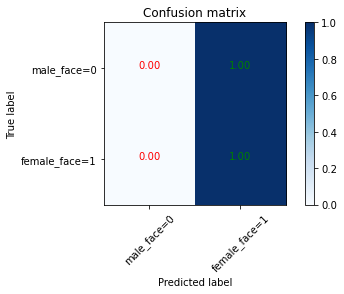

In [56]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['male_face=0','female_face=1'],normalize= True,  title='Confusion matrix')
